In [5]:
from pymodulon.core import IcaData
from pymodulon.io import load_json_model # save_to_json
# from pymodulon import example_data

In [6]:
ica_data = load_json_model("./data/e_coli_precise2.json")

In [8]:
import pickle

with open('./data/gene_name_bnum_d.pkl', 'rb') as handle:
    full_gene_bnum_d = pickle.load(handle)

In [9]:
gene_set_expression_mat = ica_data.X[ica_data.X.index.isin(full_gene_bnum_d.values())].copy()

bnum_gene_name_d = {v:k for k, v in full_gene_bnum_d.items()}
gene_set_expression_mat.rename(index=bnum_gene_name_d, inplace=True)

sample_serial_name_d = {i:r["sample"] for i, r in ica_data.sample_table.iterrows()}
gene_set_expression_mat.rename(columns=sample_serial_name_d, inplace=True)

gene_set_expression_mat.to_csv("./p1000_gene_set_expression.csv")
gene_set_expression_mat.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,ytf3__wt_pH7_lactate__1,ytf3__wt_pH7_lactate__2,ytf3__wt_pH55_lactate__1,ytf3__wt_pH55_lactate__2,ytf3__wt_pH55_HCl__1,ytf3__wt_pH55_HCl__2,ytf3__dyieP_pH7__1,ytf3__dyieP_pH7__2,ytf3__dyieP_pH55__1,ytf3__dyieP_pH55__2
gcd,-0.132923,0.132923,1.863635,2.005485,0.045481,-0.114450,1.786132,1.915357,0.431316,0.360564,...,-0.082728,-0.014756,1.113372,1.324673,1.169654,1.136788,0.027750,-0.050223,-0.080763,-0.149857
cyoE,-0.112552,0.112552,-1.260932,-1.443737,0.140065,-0.019818,-0.805842,-0.692509,0.182511,0.233417,...,1.382046,1.387320,1.604863,1.451135,1.353762,1.297906,1.236268,1.246019,1.589219,1.443211
cyoD,0.033905,-0.033905,-0.853543,-0.869156,0.245333,0.161810,-0.487216,-0.212208,0.410428,0.458473,...,1.284746,1.342612,1.476091,1.371222,1.159088,1.072889,1.128115,1.112217,1.302819,1.085602
cyoC,-0.097111,0.097111,-0.909923,-1.023020,0.090208,-0.065010,-0.550196,-0.418016,0.168586,0.233463,...,1.070790,1.099348,1.302649,1.177695,0.879020,0.781208,0.770184,0.771412,1.129667,1.089044
cyoB,-0.061801,0.061801,-1.126441,-1.230877,-0.084200,-0.101639,-0.703241,-0.508959,0.183416,0.123167,...,0.489907,0.483497,0.661044,0.587072,0.321271,0.219671,0.210958,0.223400,0.572170,0.433472


In [ ]:
# # All replicates. Very large.
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.dpi"] = 100
# sns.set_context("paper")
# sns.set_style("white")


# cm = sns.clustermap(
#     gene_set_expression_mat,
#     figsize=(180,22),
#     linewidths=0,
#     cbar_kws={'label': 'expression'},
# #     xticklabels=False,
# #     yticklabels=False,
#     center=0,
#     cmap="vlag",
# )
# cm.ax_heatmap.tick_params(axis='both', which='both', length=0)

In [11]:
import pandas as pd

In [12]:
rep_of_interest_df = pd.read_csv("./data/REDUCED-precise1000_sample_table.csv", index_col=0)
reps_of_interest = rep_of_interest_df["sample"].tolist()
gene_exp_reps_of_interest_mat = gene_set_expression_mat[reps_of_interest]

In [13]:
# explicitly setting the order of genes
CUSTOM_GENE_ORDER = [
    'fdnG', 'fdnH', 'fdnI',
    'fdoG', 'fdoH', 'fdoI',
    'fdhF', 'hycA', 'hycB', 'hycC', 'hycD', 'hycE', 'hycF', 'hycG', 'hycH',
    'hyaA', 'hyaB', 'hyaC', 'hyaD', 'hyaE', 'hyaF',
    'hybA', 'hybB', 'hybC', 'hybD', 'hybE', 'hybF', 'hybG',
    'nuoC', 'nuoH', 'nuoL', 'nuoF', 'nuoJ', 'nuoK', 'nuoN', 'nuoI', 'nuoA', 'nuoE', 'nuoB', 'nuoM', 'nuoG',
    'ndh',
    'glpD',
    'glpA', 'glpC', 'glpB',
    'poxB',
    'dld',
    'lctD',
    'dadA',
    'gcd',
    'sdhC', 'sdhD', 'sdhA', 'sdhB',
    'cyoA', 'cyoB', 'cyoC', 'cyoD', 'cyoE',
    'cydA', 'cydB',
    'cyxA', 'cyxB',
    'narG', 'narH', 'narJ', 'narI',
    'narZ', 'narY', 'narW', 'narV',
    'napF', 'napD', 'napA', 'napG', 'napH', 'napB', 'napC',
    'nrfA', 'nrfB', 'nrfC', 'nrfD', 'nrfE', 'nrfF', 'nrfG',
    'dmsA', 'dmsB', 'dmsC',
    'torC', 'torA', 'torD',
    'frdA', 'frdB', 'frdC', 'frdD',
]

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(6351.833333333333, 0.5, 'genes')

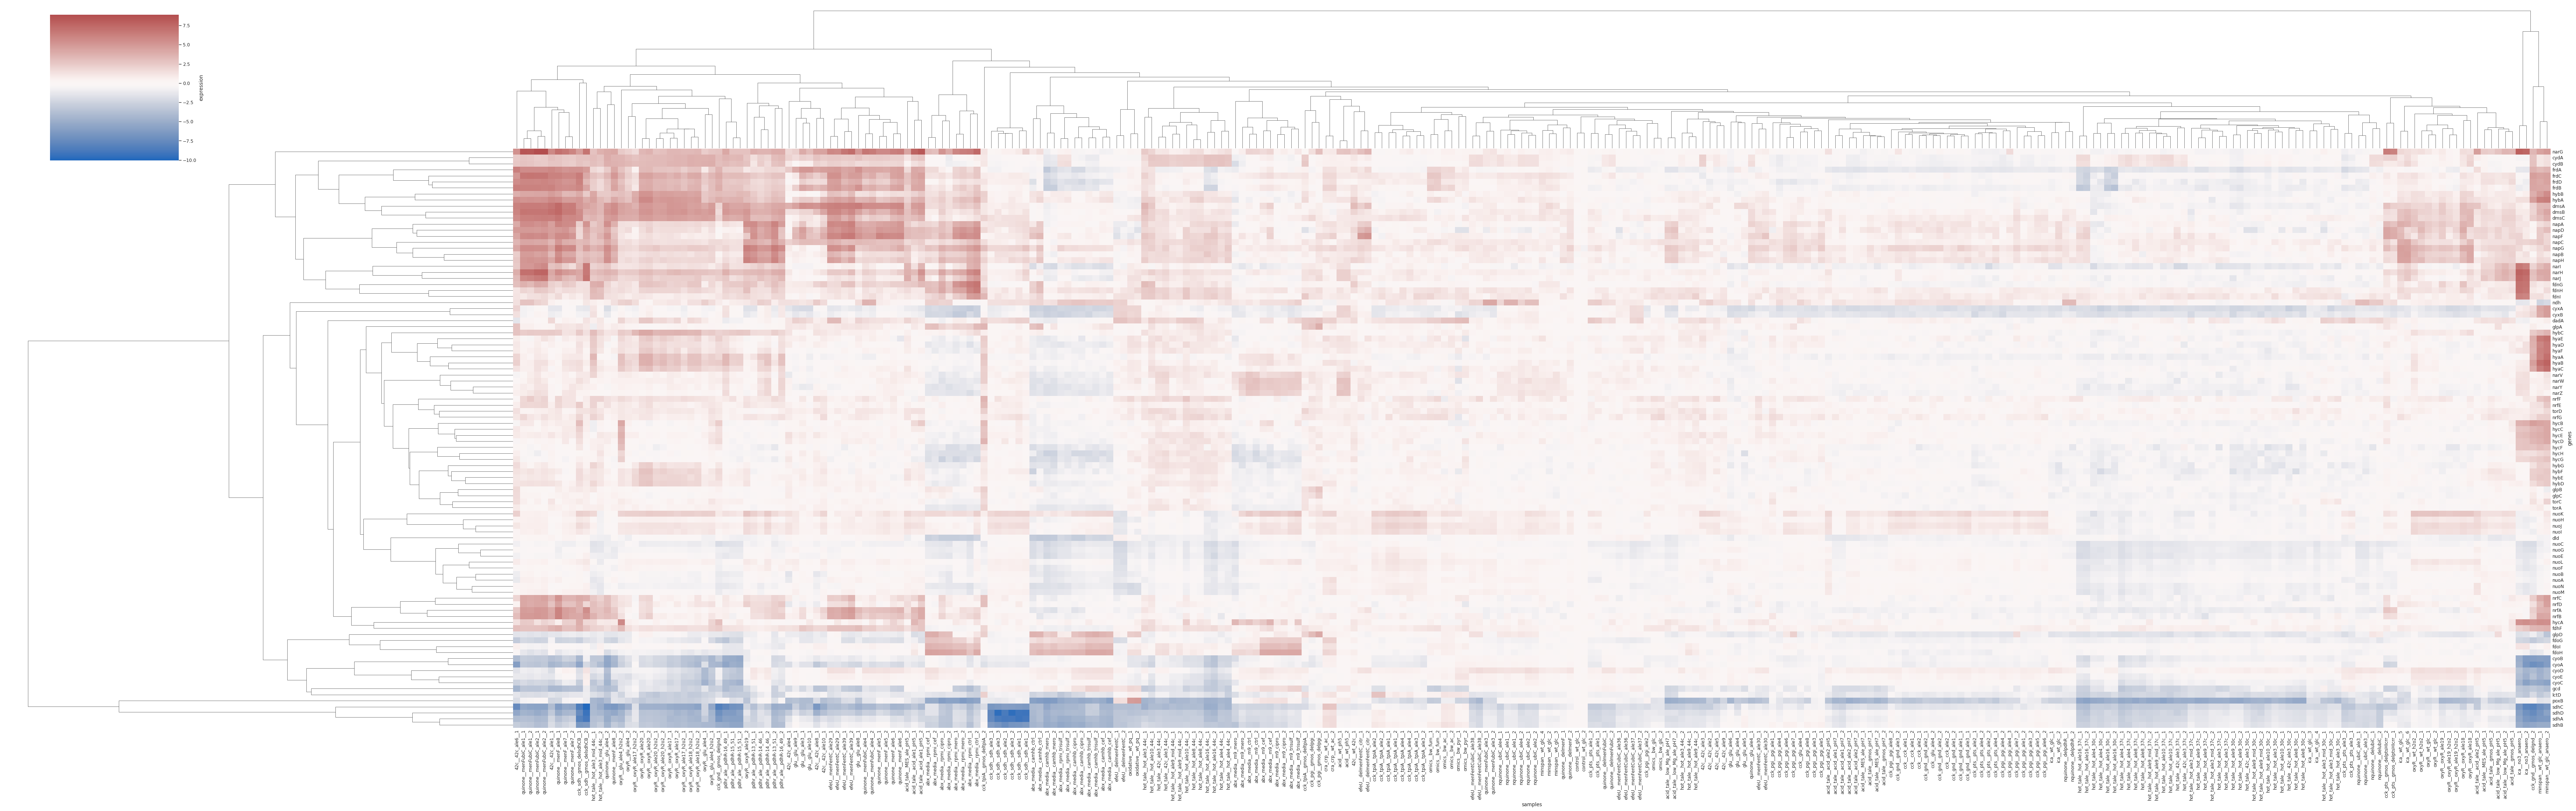

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

cm = sns.clustermap(
    gene_exp_reps_of_interest_mat,
    figsize=(70,22),
    linewidths=0,
    cbar_kws={'label': 'expression'},
    center=0,
    cmap="vlag",
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("samples")
cm.ax_heatmap.set_ylabel("genes")

In [15]:
sample_replicate_d = dict()
for rep in reps_of_interest:
    key = rep[:rep.rfind("__")]
    if key not in sample_replicate_d.keys():
        sample_replicate_d[key] = [rep]
    else:
        sample_replicate_d[key].append(rep)
# sample_replicate_d

In [16]:
# Now I have to calculate the median for each sample
sample_gene_median_exp_mat = pd.DataFrame(0.0, columns=sample_replicate_d.keys(), index=gene_exp_reps_of_interest_mat.index)
sample_gene_median_exp_mat


def _get_sample_gene_median_expr(replicates, gene):
    m = 0
    df = gene_exp_reps_of_interest_mat[replicates][gene_exp_reps_of_interest_mat.index==gene]
    if len(df) > 0:
        m = float(df.median(axis=1))
    return m
    
    
for gene, samples in sample_gene_median_exp_mat.iterrows():
    for sample in samples.index:
        sample_reps = sample_replicate_d[sample]
        sample_gene_median_exp_mat.at[gene, sample] = _get_sample_gene_median_expr(sample_reps, gene)
sample_gene_median_exp_mat

,control__wt_glc,acid__wt_ph5,oxidative__wt_pq,omics__bw_ac,omics__bw_fum,omics__bw_glc,omics__bw_pyr,minspan__wt_glc,minspan__wt_glc_anaero,cra_crp__wt_ac,...,acid_tale__acid_ale1_pH7,acid_tale__acid_ale1_pH5,acid_tale__acid_ale2_pH7,acid_tale__acid_ale2_pH5,acid_tale__low_Mg_ale_pH7,acid_tale__low_Mg_ale_pH5,acid_tale__MES_ale_pH7,acid_tale__MES_ale_pH5,acid_tale__gmos_pH7,acid_tale__gmos_pH5
gcd,0.0,1.117747,1.762473,-1.899539,-2.830925,-0.554597,-2.255758,-0.033092,-3.743628,-0.821268,...,-2.029563,-0.568753,-2.056155,-0.664696,-2.335648,-0.477126,-2.096798,0.122536,-1.843879,-0.446325
cyoE,0.0,-0.110693,-0.855627,0.517079,0.396935,-0.008662,1.193344,0.306019,-4.338224,0.113220,...,-0.080248,0.256278,0.286213,0.668279,-0.169524,0.369998,0.211595,0.332452,0.246120,0.440350
cyoD,0.0,-0.053977,-0.376670,0.376451,0.311068,-0.115337,0.899118,0.887097,-4.446269,-0.413468,...,0.461008,0.638125,0.770704,1.211251,0.369340,0.874854,0.786746,0.871694,0.882126,0.893560
cyoC,0.0,0.006293,-0.947649,0.113972,0.043433,-0.451902,0.644196,0.088715,-5.533730,0.023301,...,-0.133155,-0.182590,0.087867,0.529324,-0.245800,0.125201,0.209084,0.077966,0.204602,0.170236
cyoB,0.0,-0.138446,-1.408680,-0.052588,-0.354095,-0.755469,0.372603,-0.039600,-6.042457,0.630579,...,-0.687946,-1.102159,-0.452888,0.034229,-0.773518,-0.440816,-0.329081,-0.577843,-0.269046,-0.347308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdhF,0.0,0.350235,0.396106,0.637168,1.297364,1.089774,1.116040,0.231364,3.600930,0.464161,...,0.500906,2.470238,0.670053,0.629219,0.667384,0.588884,0.671201,1.009719,0.695046,1.025334
frdD,0.0,0.331046,0.302505,0.936784,2.161398,-0.103252,0.821471,0.875718,4.199780,1.435726,...,-0.412428,4.028479,-0.529215,0.446767,-0.266167,1.054969,-0.270859,2.004966,-0.291735,1.519864
frdC,0.0,0.939539,0.470013,1.635214,2.542890,0.003018,1.204433,1.496083,4.457161,1.770304,...,-0.519097,4.411786,-0.770648,0.357220,-0.281773,1.142073,-0.379426,1.972017,-0.087771,1.296656
frdB,0.0,0.872053,0.501696,1.788403,2.365866,0.143706,0.751457,1.057016,4.115715,2.040667,...,-1.026110,4.261065,-0.900227,-0.187086,-0.863186,0.240647,-0.782178,1.487299,-0.950491,0.686969


In [17]:
sample_gene_median_exp_mat = sample_gene_median_exp_mat.reindex(CUSTOM_GENE_ORDER)

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


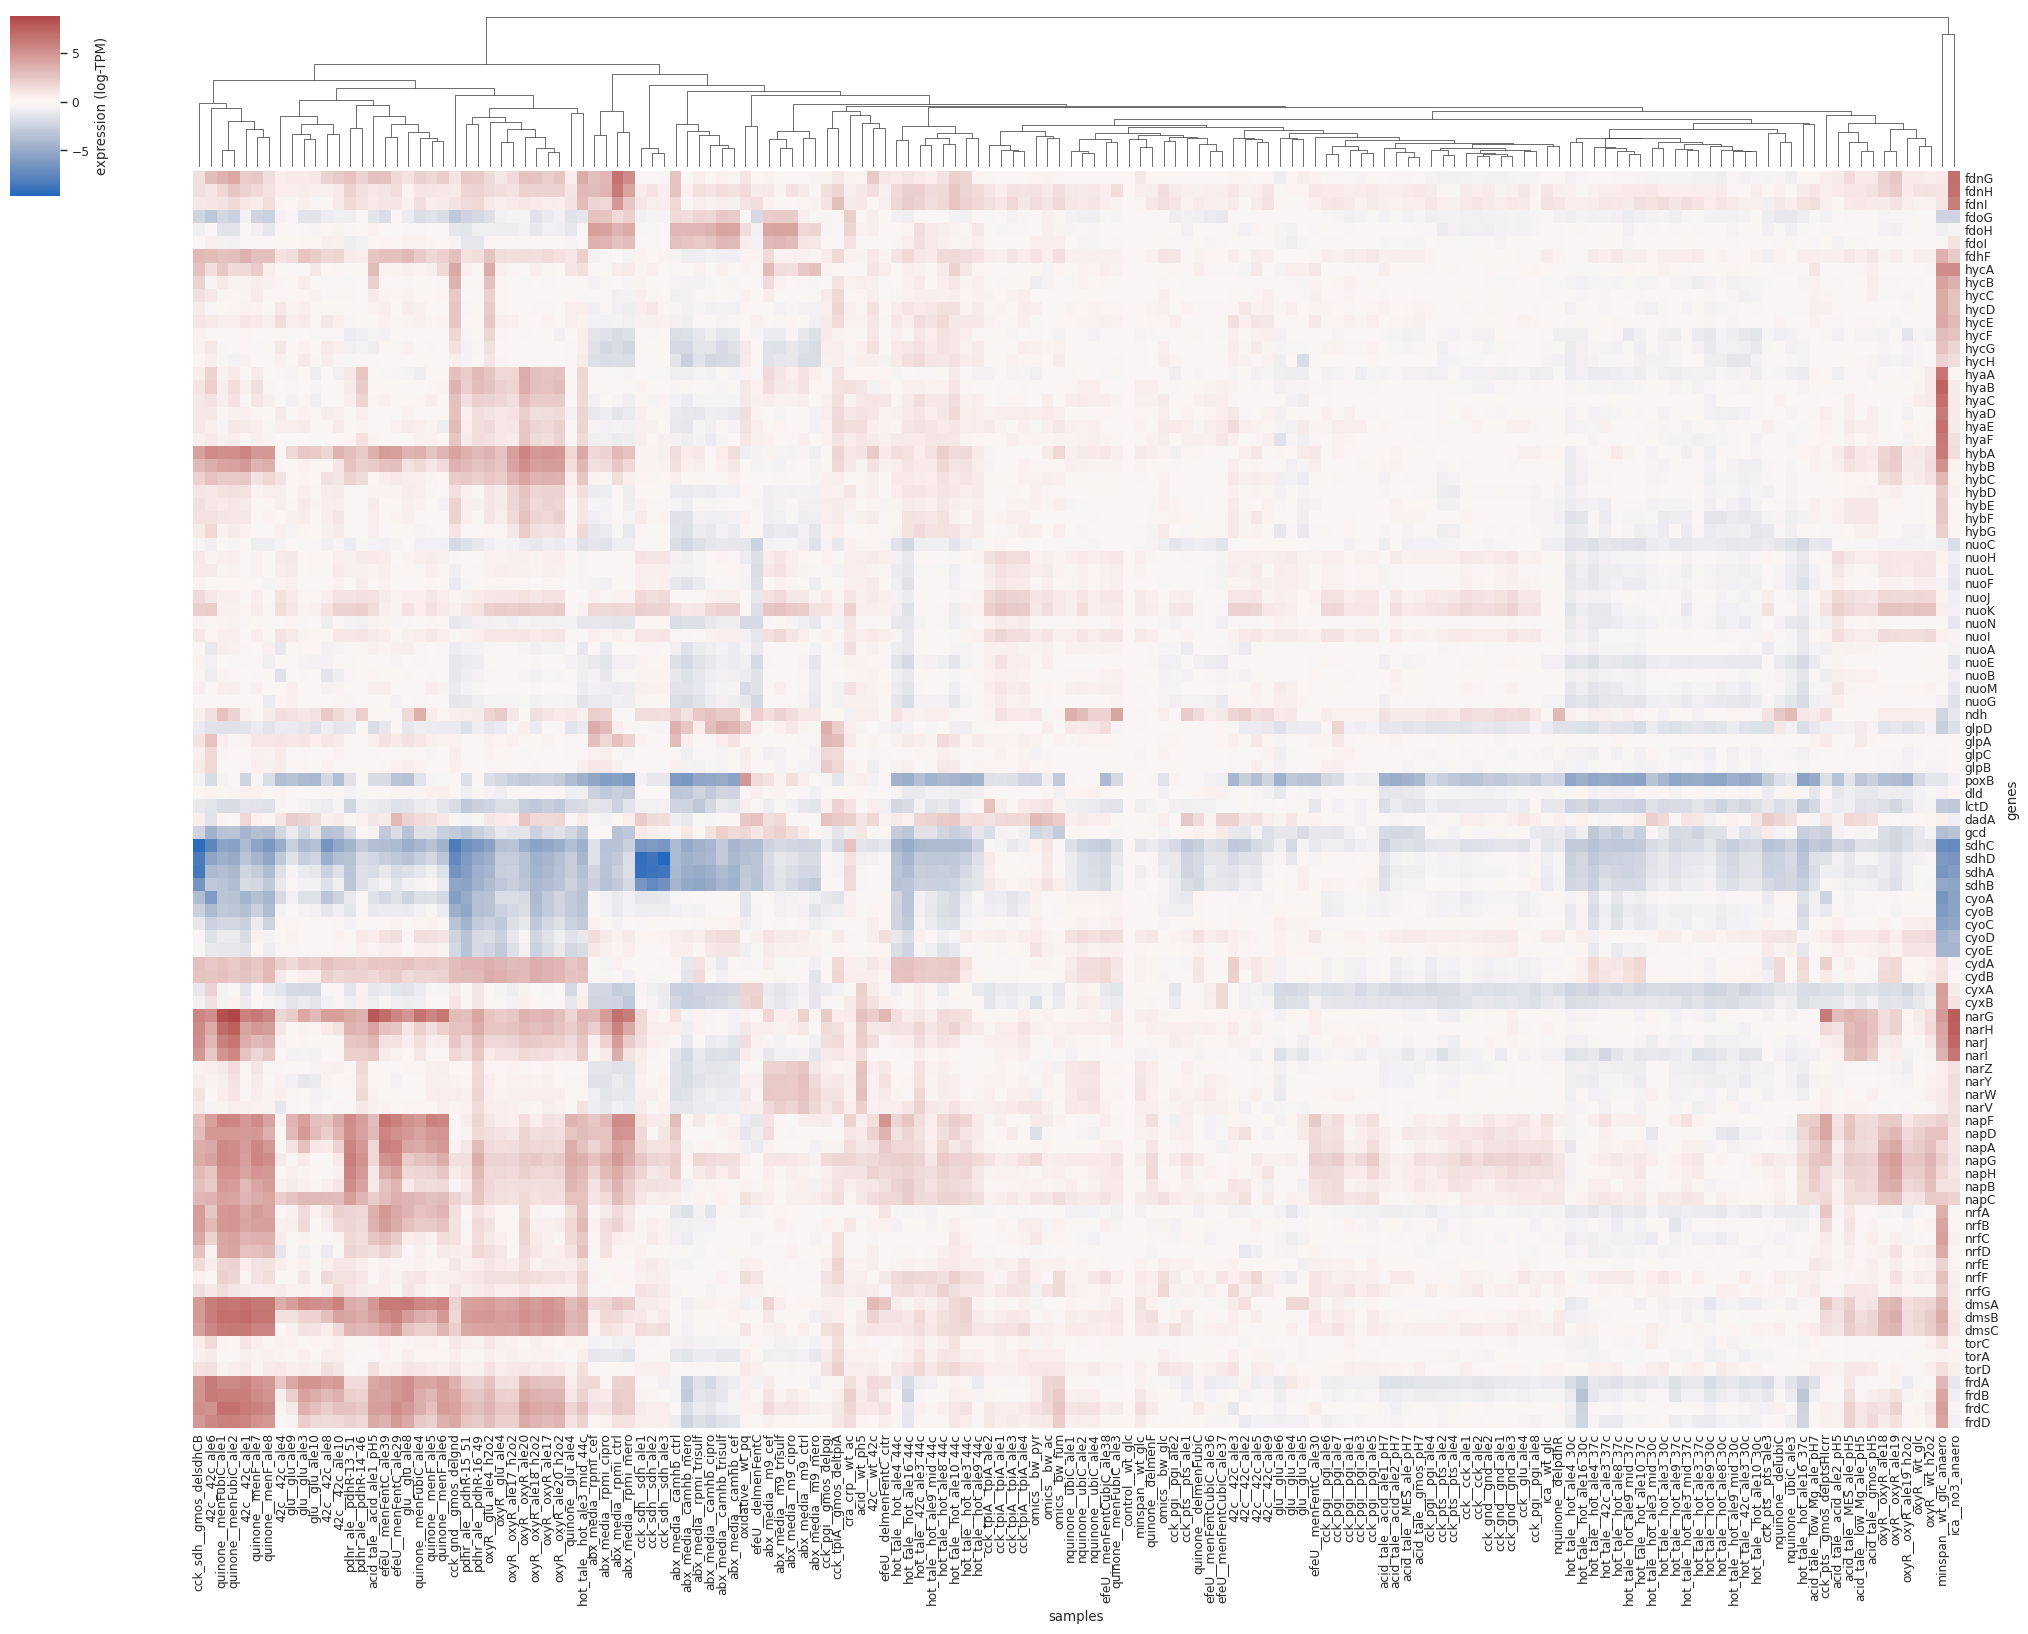

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")


cm = sns.clustermap(
    sample_gene_median_exp_mat,
#     figsize=(35,22),
    linewidths=0,
    xticklabels=True, yticklabels=True,
    cbar_kws={'label': 'expression (log-TPM)'},
    center=0,
    cmap="vlag",
    row_cluster=False
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("samples")
cm.ax_heatmap.set_ylabel("genes")


H = 2
W = 2.4
y0_offset = -0.63
x0_offset = 0
hm = cm.ax_heatmap.get_position()
# mpl.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# mpl.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0 + x0_offset,
    col_dendo.y0,
    col_dendo.width*W,
    col_dendo.height*1
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.015,
    row_dendo.y0 + y0_offset,
    row_dendo.width*1,
    row_dendo.height*H
])
cm.ax_heatmap.set_position([
    hm.x0 + x0_offset,
    hm.y0 + y0_offset,
    hm.width*W,
    hm.height*H
])
cm.savefig("median_gene_expression_samples_set.svg")

In [19]:
# This logic won't combine WT and ALEs, which is what we want since these are different resutls
exp_rep_d = dict()
for rep in reps_of_interest:
    
    exp = ""
    if "ale" in rep:
        exp = rep[:rep.rfind("_ale")]
    else:
        exp = rep[:rep.rfind("__")]
    
    if exp not in exp_rep_d.keys():
        exp_rep_d[exp] = [rep]
    else:
        exp_rep_d[exp].append(rep)
# Some samples that shouldn't be grouped toegether still are.
# Haven't yet put found the logic for working 
# display(exp_rep_d)


# Have to manually update since previous parsing logic can't handle certain corner cases
del exp_rep_d["oxyR__glu"]
exp_rep_d["oxyR__glu"] = ['oxyR__glu_ale4__1', 'oxyR__glu_ale4__2']
exp_rep_d['oxyR__glu_h2o2'] = ['oxyR__glu_ale4_h2o2__1','oxyR__glu_ale4_h2o2__2']

del exp_rep_d["oxyR__oxyR"]
exp_rep_d["oxyR__oxyR"] = ['oxyR__oxyR_ale17__1',
                           'oxyR__oxyR_ale17__2',
                           'oxyR__oxyR_ale18__1',
                           'oxyR__oxyR_ale18__2',
                           'oxyR__oxyR_ale19__1',
                           'oxyR__oxyR_ale19__2',
                           'oxyR__oxyR_ale20__1',
                           'oxyR__oxyR_ale20__2']

exp_rep_d["oxyR__oxyR_h2o2"] = [
'oxyR__oxyR_ale17_h2o2__1',
'oxyR__oxyR_ale17_h2o2__2',
'oxyR__oxyR_ale18_h2o2__1',
'oxyR__oxyR_ale18_h2o2__2',
'oxyR__oxyR_ale19_h2o2__1',
'oxyR__oxyR_ale19_h2o2__2',
'oxyR__oxyR_ale20_h2o2__1',
'oxyR__oxyR_ale20_h2o2__2']

del exp_rep_d["hot_tale__hot"]
exp_rep_d["hot_tale__30c"] = [
#     'hot_tale__hot_ale3_mid_30c__1',
# 'hot_tale__hot_ale3_mid_30c__2',
    'hot_tale__hot_ale3_30c__1',
'hot_tale__hot_ale3_30c__2',
    'hot_tale__hot_ale4_30c__1',
'hot_tale__hot_ale4_30c__2',
    'hot_tale__hot_ale8_30c__1',
'hot_tale__hot_ale8_30c__2',
#     'hot_tale__hot_ale9_mid_30c__1',
# 'hot_tale__hot_ale9_mid_30c__2',
    'hot_tale__hot_ale9_30c__1',
'hot_tale__hot_ale9_30c__2',
    'hot_tale__hot_ale10_30c__1',
'hot_tale__hot_ale10_30c__2',
    'hot_tale__hot_ale16_30c__1',
'hot_tale__hot_ale16_30c__2',
]

exp_rep_d["hot_tale__37c"] = [
#     'hot_tale__hot_ale3_mid_37c__1',
# 'hot_tale__hot_ale3_mid_37c__2',
    'hot_tale__hot_ale3_37c__1',
'hot_tale__hot_ale3_37c__2',
    'hot_tale__hot_ale4_37c__1',
'hot_tale__hot_ale4_37c__2',
    'hot_tale__hot_ale8_37c__1',
'hot_tale__hot_ale8_37c__2',
#     'hot_tale__hot_ale9_mid_37c__1',
# 'hot_tale__hot_ale9_mid_37c__2',
    'hot_tale__hot_ale9_37c__1',
'hot_tale__hot_ale9_37c__2',
    'hot_tale__hot_ale10_37c__1',
'hot_tale__hot_ale10_37c__2',
    'hot_tale__hot_ale16_37c__1',
'hot_tale__hot_ale16_37c__2',
]

exp_rep_d["hot_tale__44c"] = [
# 'hot_tale__hot_ale3_mid_44c__1',
# 'hot_tale__hot_ale3_mid_44c__2',
    'hot_tale__hot_ale3_44c__1',
'hot_tale__hot_ale3_44c__2',
    'hot_tale__hot_ale4_44c__1',
'hot_tale__hot_ale4_44c__2',
    'hot_tale__hot_ale8_44c__1',
'hot_tale__hot_ale8_44c__2',
#     'hot_tale__hot_ale9_mid_44c__1',
# 'hot_tale__hot_ale9_mid_44c__2',
    'hot_tale__hot_ale9_44c__1',
'hot_tale__hot_ale9_44c__2',
    'hot_tale__hot_ale10_44c__1',
'hot_tale__hot_ale10_44c__2',
    'hot_tale__hot_ale16_44c__1',
'hot_tale__hot_ale16_44c__2'
]

In [20]:
exp_gene_median_expr_mat = pd.DataFrame(0.0, columns=exp_rep_d.keys(), index=gene_exp_reps_of_interest_mat.index)


def _get_exp_gene_median_expr(replicates, gene):
    m = 0
    df = gene_exp_reps_of_interest_mat[replicates][gene_exp_reps_of_interest_mat.index==gene]
    if len(df) > 0:
        m = float(df.median(axis=1))
    return m
    
    
for gene, experiments in exp_gene_median_expr_mat.iterrows():
    for exp in experiments.index:
        exp_reps = exp_rep_d[exp]
        exp_gene_median_expr_mat.at[gene, exp] = _get_exp_gene_median_expr(exp_reps, gene)
exp_gene_median_expr_mat

,control__wt_glc,acid__wt_ph5,oxidative__wt_pq,omics__bw_ac,omics__bw_fum,omics__bw_glc,omics__bw_pyr,minspan__wt_glc,minspan__wt_glc_anaero,cra_crp__wt_ac,...,acid_tale__MES,acid_tale__gmos_pH7__,acid_tale__gmos_pH5__,oxyR__glu,oxyR__glu_h2o2,oxyR__oxyR,oxyR__oxyR_h2o2,hot_tale__30c,hot_tale__37c,hot_tale__44c
gcd,0.0,1.117747,1.762473,-1.899539,-2.830925,-0.554597,-2.255758,-0.033092,-3.743628,-0.821268,...,-0.989323,-1.843879,-0.446325,-1.190510,-2.101366,-1.886925,-1.771184,-1.331285,-2.642118,-2.542294
cyoE,0.0,-0.110693,-0.855627,0.517079,0.396935,-0.008662,1.193344,0.306019,-4.338224,0.113220,...,0.285878,0.246120,0.440350,-2.962545,-2.340763,-0.500103,-1.136943,-0.024478,-0.879849,-1.500949
cyoD,0.0,-0.053977,-0.376670,0.376451,0.311068,-0.115337,0.899118,0.887097,-4.446269,-0.413468,...,0.802293,0.882126,0.893560,-2.501176,-1.907491,-0.267415,-0.814494,0.662462,-0.118109,-0.714802
cyoC,0.0,0.006293,-0.947649,0.113972,0.043433,-0.451902,0.644196,0.088715,-5.533730,0.023301,...,0.201143,0.204602,0.170236,-3.047327,-2.556025,-0.949962,-1.648128,-0.595135,-1.293284,-1.604870
cyoB,0.0,-0.138446,-1.408680,-0.052588,-0.354095,-0.755469,0.372603,-0.039600,-6.042457,0.630579,...,-0.330456,-0.269046,-0.347308,-2.510562,-3.370512,-1.445287,-2.263270,-0.607467,-1.403557,-1.855908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdhF,0.0,0.350235,0.396106,0.637168,1.297364,1.089774,1.116040,0.231364,3.600930,0.464161,...,0.705811,0.695046,1.025334,1.472869,2.633999,1.145687,1.227047,0.250100,0.758988,1.488673
frdD,0.0,0.331046,0.302505,0.936784,2.161398,-0.103252,0.821471,0.875718,4.199780,1.435726,...,0.536991,-0.291735,1.519864,2.062828,2.955182,2.816208,3.053471,-0.888940,-0.881853,-0.055481
frdC,0.0,0.939539,0.470013,1.635214,2.542890,0.003018,1.204433,1.496083,4.457161,1.770304,...,0.507288,-0.087771,1.296656,2.428017,3.429683,3.218213,3.589119,-0.623177,-0.272225,0.286608
frdB,0.0,0.872053,0.501696,1.788403,2.365866,0.143706,0.751457,1.057016,4.115715,2.040667,...,0.098262,-0.950491,0.686969,2.015319,3.156133,2.695657,3.134844,-1.064053,-1.070037,-0.255166


In [21]:
exp_gene_median_expr_mat = exp_gene_median_expr_mat.reindex(CUSTOM_GENE_ORDER)
exp_gene_median_expr_mat

,control__wt_glc,acid__wt_ph5,oxidative__wt_pq,omics__bw_ac,omics__bw_fum,omics__bw_glc,omics__bw_pyr,minspan__wt_glc,minspan__wt_glc_anaero,cra_crp__wt_ac,...,acid_tale__MES,acid_tale__gmos_pH7__,acid_tale__gmos_pH5__,oxyR__glu,oxyR__glu_h2o2,oxyR__oxyR,oxyR__oxyR_h2o2,hot_tale__30c,hot_tale__37c,hot_tale__44c
fdnG,0.0,0.341012,1.135929,0.382838,0.242387,0.173934,0.298585,0.934204,0.912919,0.383976,...,0.217268,-0.146769,0.853365,1.009379,1.647357,2.404680,2.285722,-0.632184,-0.384854,1.104571
fdnH,0.0,0.988698,1.548455,0.916061,1.500994,1.367179,1.284051,0.694731,1.108583,0.643977,...,0.918171,0.945449,1.276022,1.411398,1.574329,1.929521,1.650536,0.552209,0.752285,1.693479
fdnI,0.0,0.989282,1.189046,1.107566,1.606508,1.338435,1.464498,0.330606,1.127485,0.805509,...,0.716436,0.633707,0.905166,0.644022,0.869606,0.961190,0.739259,0.782626,1.122591,1.948742
fdoG,0.0,0.162107,-0.175128,0.574301,0.341060,-0.302465,0.094882,-0.012033,-2.398111,2.133129,...,-0.567351,-0.520826,-0.174396,-0.725177,-1.730304,-0.556922,-0.697936,-0.627422,-0.779439,-0.478097
fdoH,0.0,0.445378,1.476493,0.627121,0.416136,-0.069808,-0.050492,-0.169273,-0.826846,1.856776,...,-0.144501,-0.309423,-0.157771,-0.951826,-0.860283,-0.660093,-0.811805,-0.143329,-0.246192,0.367950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
torD,0.0,0.672588,0.884357,1.042751,1.037007,1.270407,0.994224,0.561012,1.330083,0.570484,...,0.600191,0.580938,0.855638,0.739127,1.195440,0.736871,0.870514,0.308465,0.418844,1.303263
frdA,0.0,0.735132,0.439160,1.739955,2.005730,-0.386035,0.709900,0.464763,3.314843,1.362255,...,-0.518754,-1.339866,-0.122328,1.406490,2.633062,1.823405,2.488072,-1.641044,-1.491851,-0.800757
frdB,0.0,0.872053,0.501696,1.788403,2.365866,0.143706,0.751457,1.057016,4.115715,2.040667,...,0.098262,-0.950491,0.686969,2.015319,3.156133,2.695657,3.134844,-1.064053,-1.070037,-0.255166
frdC,0.0,0.939539,0.470013,1.635214,2.542890,0.003018,1.204433,1.496083,4.457161,1.770304,...,0.507288,-0.087771,1.296656,2.428017,3.429683,3.218213,3.589119,-0.623177,-0.272225,0.286608


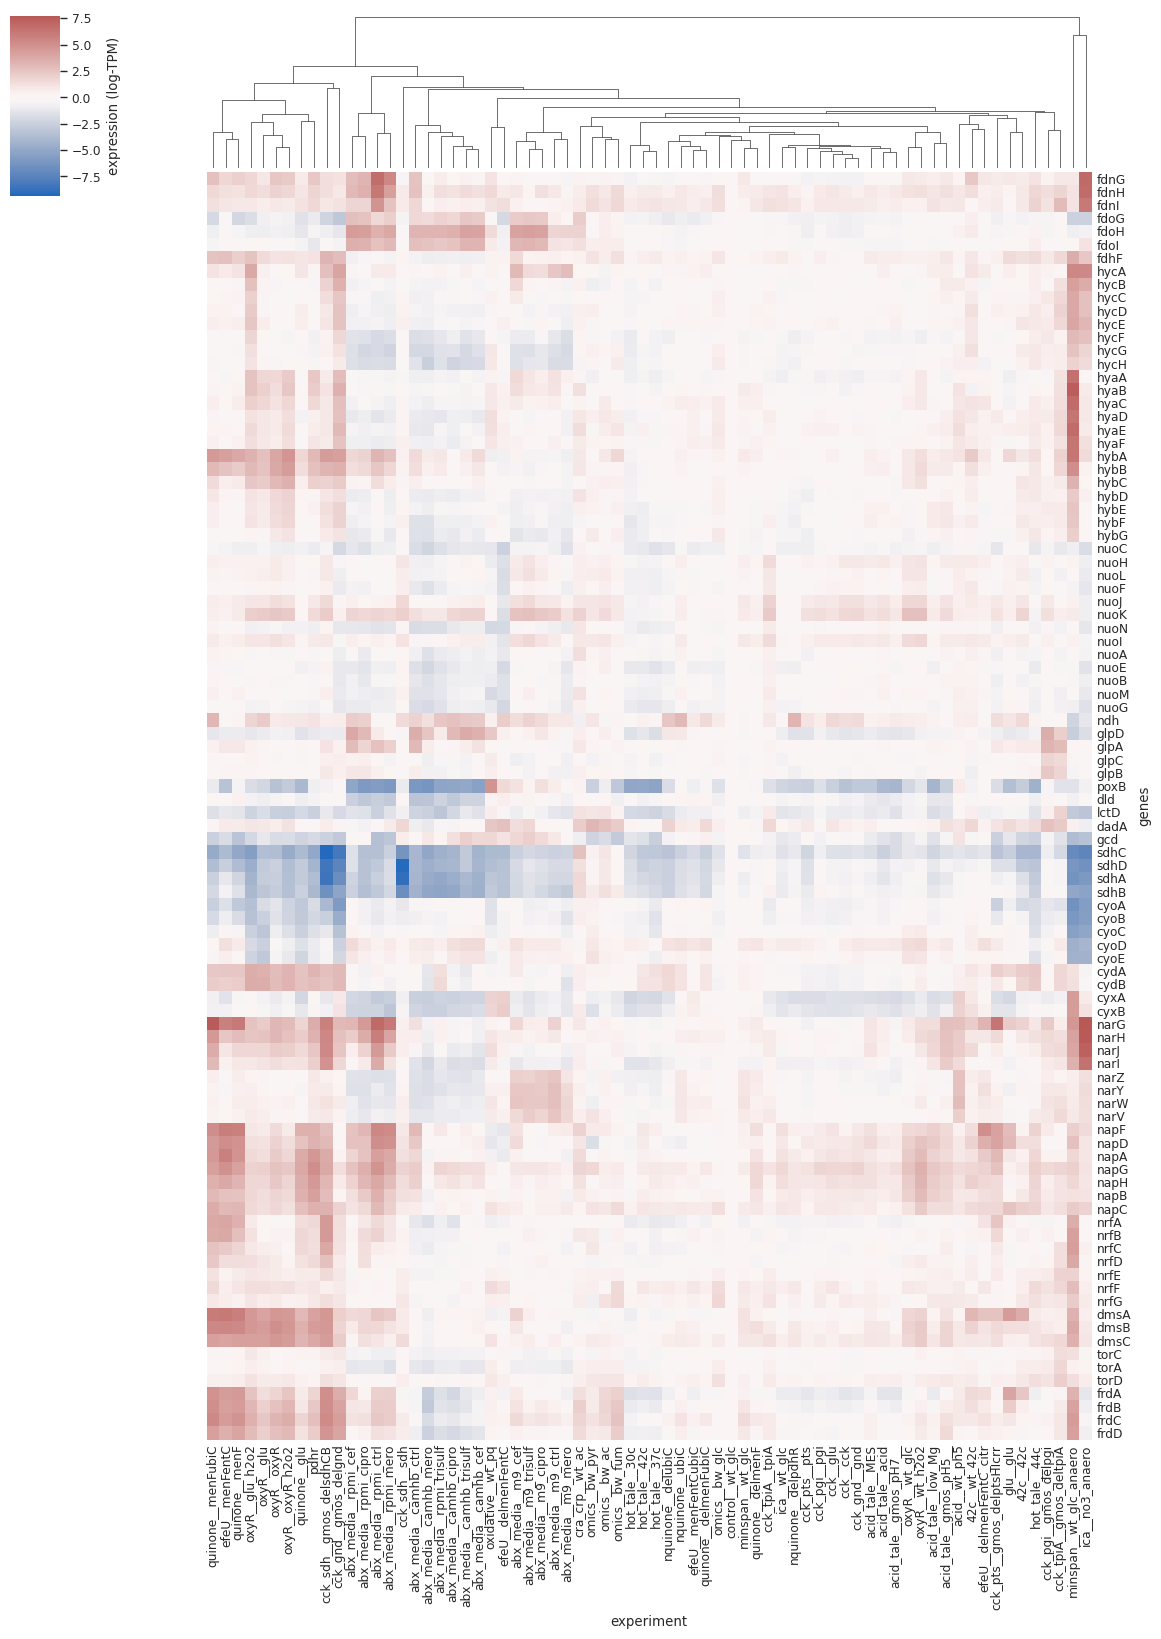

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")


cm = sns.clustermap(
    exp_gene_median_expr_mat,
#     figsize=(15,22),
    linewidths=0,
    xticklabels=True, yticklabels=True,
    cbar_kws={'label': 'expression (log-TPM)'},
    center=0,
    cmap="vlag",
    row_cluster=False
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("experiment")
cm.ax_heatmap.set_ylabel("genes")

H = 2
W = 1.2
y0_offset = -0.635
x0_offset = 0.015
hm = cm.ax_heatmap.get_position()
# mpl.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# mpl.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0 + x0_offset,
    col_dendo.y0,
    col_dendo.width*W,
    col_dendo.height*1
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.015,
    row_dendo.y0 + y0_offset,
    row_dendo.width*1,
    row_dendo.height*H
])
cm.ax_heatmap.set_position([
    hm.x0 + x0_offset,
    hm.y0 + y0_offset,
    hm.width*W,
    hm.height*H
])
cm.savefig("median_gene_expression_exp_set.svg")
# col_color_pos = cm.ax_col_colors.get_position()
# cm.ax_col_colors.set_position([
#     col_color_pos.x0 + 0.01,
#     col_color_pos.y0 + 0.01,
#     col_color_pos.width*W,
#     col_color_pos.height*H
# ])